In [2]:
from IPython import display
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def load_image(filename):
    img = np.load(filename)
    img = img.astype("float32") / 255.
    return img


In [6]:
def gray2rgb(image):
    return np.repeat(np.expand_dims(image, 2), 3, axis=2)

In [7]:
def show_image(img):
    plt.imshow(img, interpolation='nearest')

In [8]:
images = [load_image('red.npy'),
          load_image('green.npy'),
          load_image('blue.npy')]


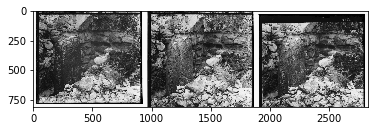

In [18]:
show_image(gray2rgb(np.concatenate(images, axis=1)))

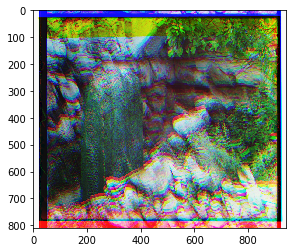

In [19]:
show_image(np.stack(images, axis=-1))

In [24]:
# Store the height and width of the images
height, width = images[0].shape

# Pad each image with black by 30 pixels. You do not need to use this, but
# padding may make your implementation easier.
pad_size = 30
images_pad = [np.pad(x, pad_size, mode='constant') for x in images]

# Given two matrices, write a function that returns a number of how well they are aligned.
# The lower the number, the better they are aligned. There are a variety of scoring functions
# you can use. The simplest one is the Euclidean distance between the two matrices. 
def score_function(im1, im2):
    # TODO
    score = np.sqrt(np.sum(np.square(im1-im2)))
    pass
    return score

# Given two matrices chan1 and chan2, return a tuple of how to shift chan2 into chan1. This
# function should search over many different shifts, and find the best shift that minimizes
# the scoring function defined above. 
def align_channels(chan1, chan2):
    best_offset = (0,0)
    best_score = score_function(chan1,chan2)
    # choose chan1 as the base image
    # TODO
    x_offest = 0
    y_offest = 0
    x_max , y_max = chan1.shape
    length_x , length_y = images[0].shape
    while x_offest <=pad_size*2:
        while y_offest <= pad_size*2:
            temp_chan2 = chan2[pad_size:pad_size+length_x,pad_size:pad_size+length_y]
            temp_chan1 = chan1[x_offest:x_offest+length_x,y_offest:y_offest+length_y]
            temp_score = score_function(temp_chan1,temp_chan2)
            if temp_score < best_score:
                best_score = temp_score
                best_offset = (x_offest-pad_size,y_offest-pad_size)
            y_offest += 1
        x_offest += 1
    print(best_score)
    return best_offset

rg_dx, rg_dy = align_channels(images_pad[0], images_pad[1])
rb_dx, rb_dy = align_channels(images_pad[0], images_pad[2])

215.4422
254.85619


In [29]:
print(rg_dx)
print(rg_dy)
print(rb_dx)
print(rb_dy)

0
0
-30
0


In [66]:
rg_dx = -11
rb_dx = -11
rb_dy = 0

In [67]:
# Use the best alignments to now combine the three images. You should use any of the variables
# above to return a tensor that is (Height)x(Width)x3, which is a color image that you can visualize.
def combine_images():
    #TODO
    #length_x , length_y = images[0].shape
    final_g = images_pad[0].copy()
    final_g[:,:] = 0.
    final_g[rg_dx+pad_size:rg_dx+pad_size+height,rg_dy+pad_size:rg_dy+pad_size+width] = images[1]
    
    
    final_b = images_pad[0].copy()
    final_b[:,:] = 0.
    #final_b[-11+pad_size:-11+pad_size+height,rb_dy+pad_size:rb_dy+pad_size+width] = images[2] 
    final_b[rb_dx+pad_size:rb_dx+pad_size+height,rb_dy+pad_size:rb_dy+pad_size+width] = images[2]
    #crop the padding
    final_image = [
        images[0],
        final_g[pad_size:pad_size+height,pad_size:pad_size+width],
        final_b[pad_size:pad_size+height,pad_size:pad_size+width]
    ]
    return np.stack(final_image,axis=-1)

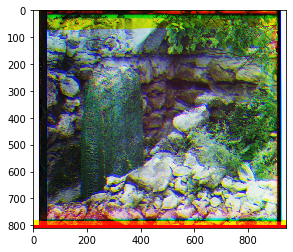

In [68]:
final_image = combine_images()
if final_image is not None:
    show_image(final_image)